In [35]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.patches  as patches
from scipy.stats import norm
sns.set_style('darkgrid')
random.seed(30)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (12.5, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Normality Assumption

- We have the assumption that the distribution of the means follows a normal distribution. 

In [24]:
population = np.random.beta(3, 1, size=6000)




one,five,ten,hundred,thousand = [],[],[],[],[]


def sample_generator():
    my_lists = [[],[],[],[],[]]
    sample_sizes = [1, 3, 10, 100, 1000]
    idx = 0 
    for sample_size in sample_sizes:
        for j in range(0,1000):
            sample_variant = random.choices(population, k=sample_size)
            mean = sum(sample_variant)/len(sample_variant)
            my_lists[idx].append(mean)
        idx += 1 
    return my_lists
        


In [25]:
my_lists = sample_generator()

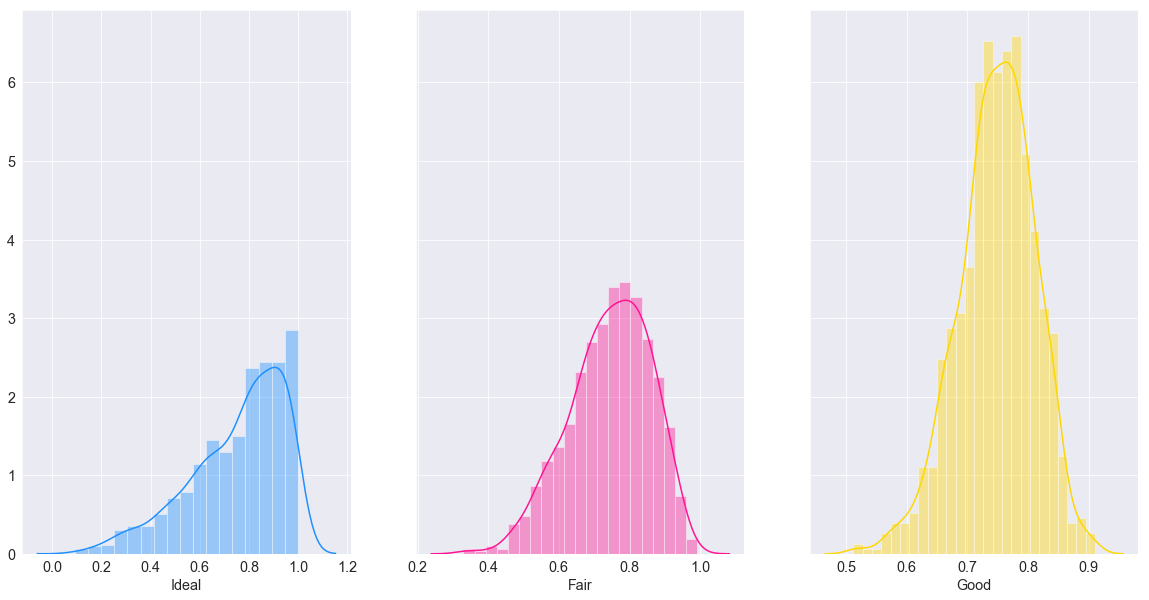

In [41]:
# Import data

x1,x2,x3 = my_lists[0], my_lists[1], my_lists[2]

# plot
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='Ideal')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='Fair')
sns.distplot(x3 , color="gold", ax=axes[2], axlabel='Good')

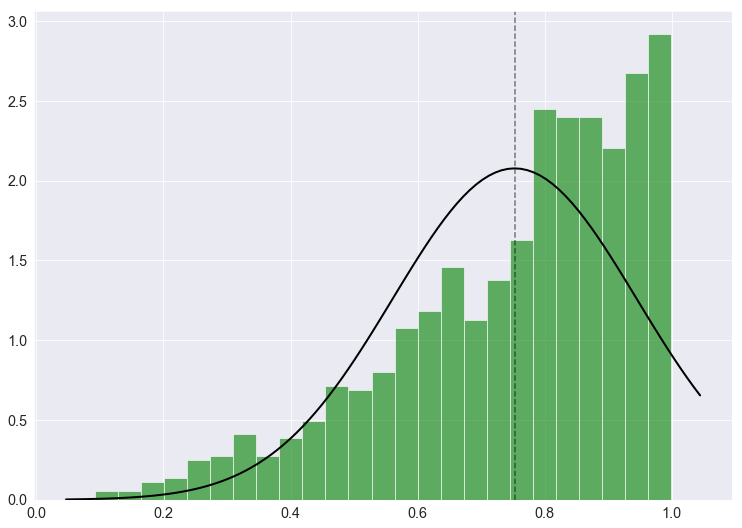

In [27]:
#plt.hist(my_lists[0], color='grey', edgecolor = "black")


data = my_lists[0]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.axvline(x= mu, color = "black", alpha=0.5,linestyle='--')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)


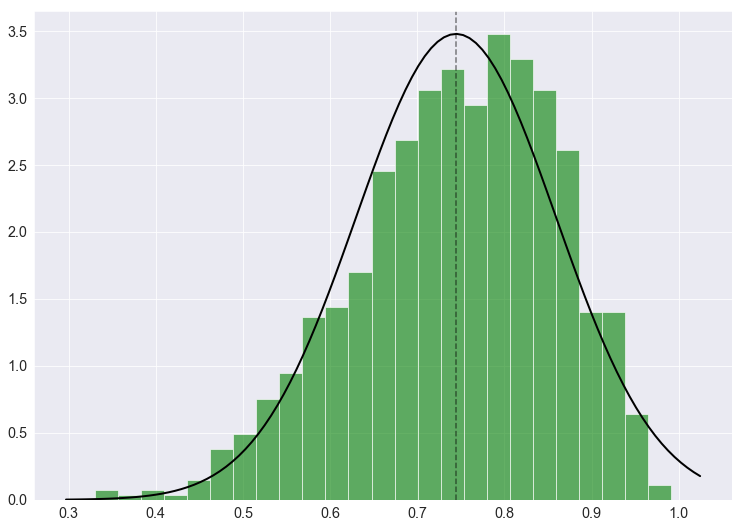

In [28]:
#plt.hist(my_lists[0], color='grey', edgecolor = "black")


data = my_lists[1]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.axvline(x= mu, color = "black", alpha=0.5,linestyle='--')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)





In [98]:
my_lists[0].append(1)

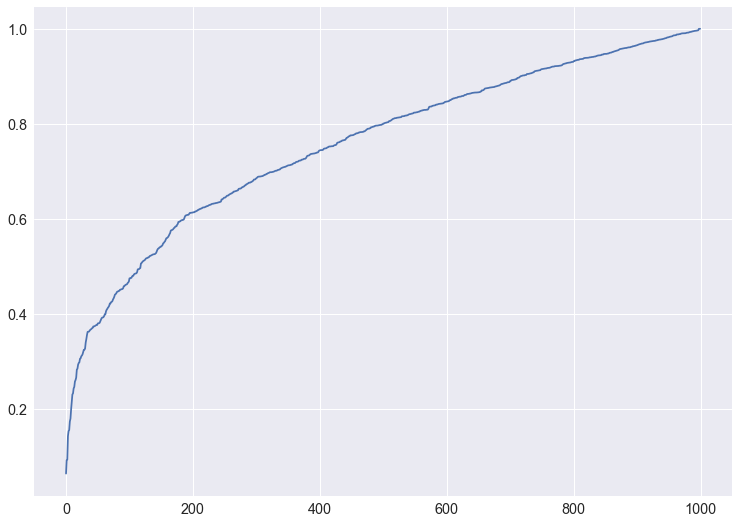

In [72]:
plt.plot(np.sort(population))

### Q-Q Plots:

Quantile plot is a grpahical tool to assess if the set of data came from a desired distribution. It is a scatterplot created by two sets of quantiles against one other. If both sets of quantiles came from the same distribution, we would see the points forming a line that is roughly straight. For Normal distribution, with a mean of 0. The 0.5 quantile, or 50th percentile, is 0. Half the data lie below 0. The 0.95 quantile, or 95th percentile, is about 1.64. Similarly, 95 percent of the data lie below 1.64. 
__We are comparing theoretical 'ideal normal distribution quantiles' with the observed one. If they line up, we have a normal distribution.__

   percent_below  quantile
0            0.1 -3.074884
1            0.2 -1.187611
2            0.3 -0.396751
3            0.4 -0.202082
4            0.5 -0.014645
5            0.6  0.025233
6            0.7  0.190960
7            0.8  1.283206
8            0.9  4.121629


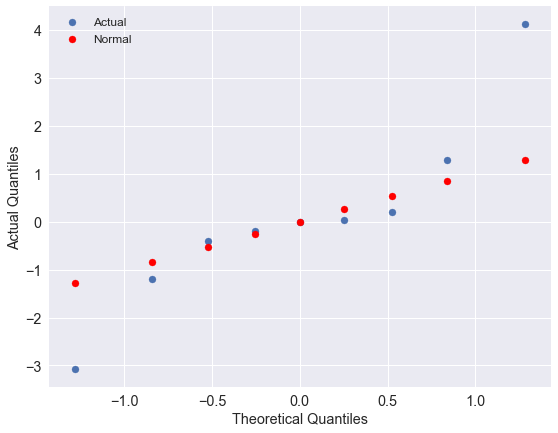

In [62]:
import pandas as pd 
from scipy.stats import norm

N = 10
t_dist = sorted(np.random.standard_t(1, size=10))
t_dist

t_dist_quantiles = []
quantiles_percent = []
for i, val in enumerate(t_dist[:-1]):
    t_dist_quantiles.append((val + t_dist[i+1])/2)
    quantiles_percent.append((i+1)/len(t_dist))

qp_array = np.array(quantiles_percent).reshape(-1,1)
tq_array = np.array(t_dist_quantiles).reshape(-1,1)
qq_df = pd.DataFrame(np.concatenate((qp_array, tq_array), axis=1),
                     columns=['percent_below', 'quantile'])
print(qq_df)

qq_df['theoretical_quantile'] = [norm.ppf(percentage) for percentage in qq_df['percent_below']]

plt.subplots(figsize=(9,7))
plt.scatter(x=qq_df['theoretical_quantile'],
            y=qq_df['quantile'], label='Actual');
plt.scatter(x=qq_df['theoretical_quantile'],
            y=qq_df['theoretical_quantile'], 
            c='red', label='Normal')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Actual Quantiles')
plt.legend()

In [21]:
def create_data():
    s = np.random.normal(mu, sigma, 1000)
    return s 

In [ ]:
import random
# Generate some uniformly distributed random variables
random_uniform = [random.random() for i in range(1000)]
# Create QQ plot
sm.qqplot(np.array(random_uniform), line='45')
plt.show()

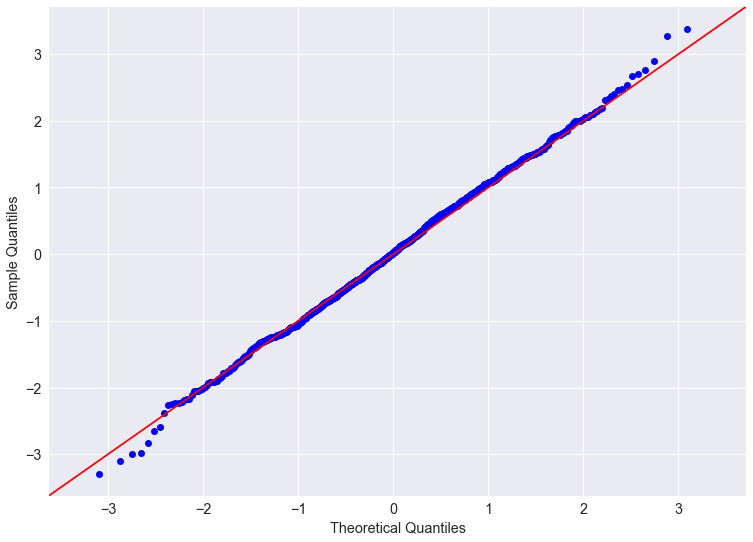

In [55]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
# Create QQ plot
random_normals = [np.random.normal() for i in range(1000)]
sm.qqplot(np.array(random_normals), line='45')
plt.show()

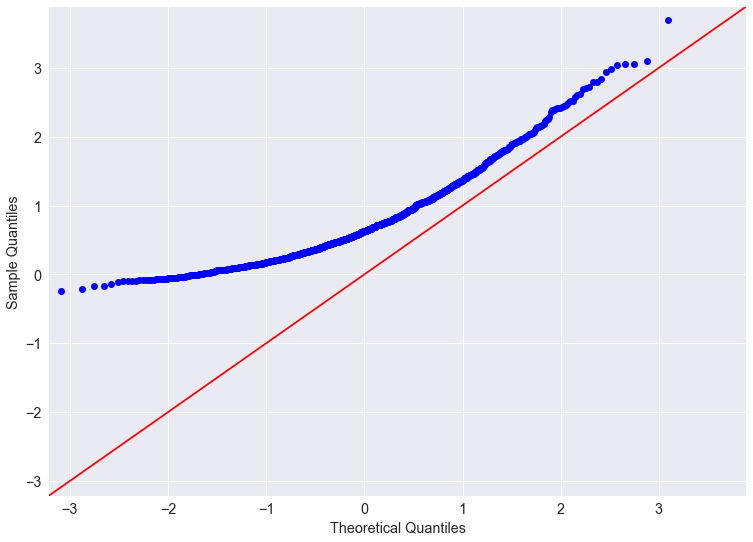

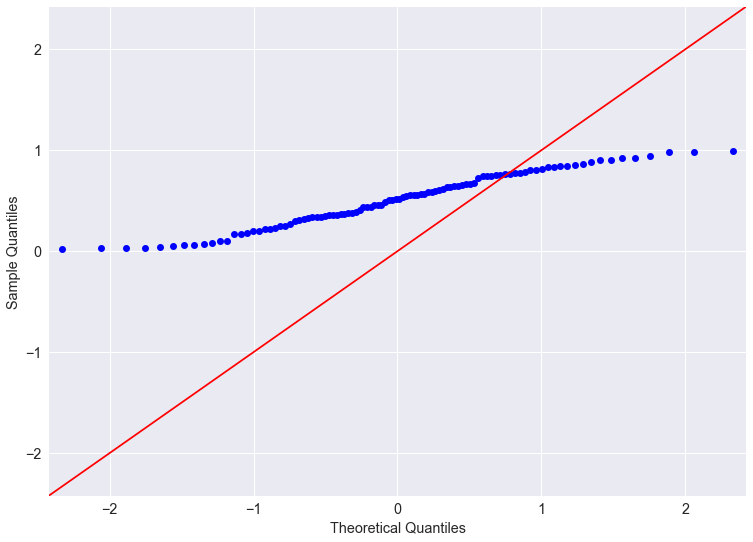

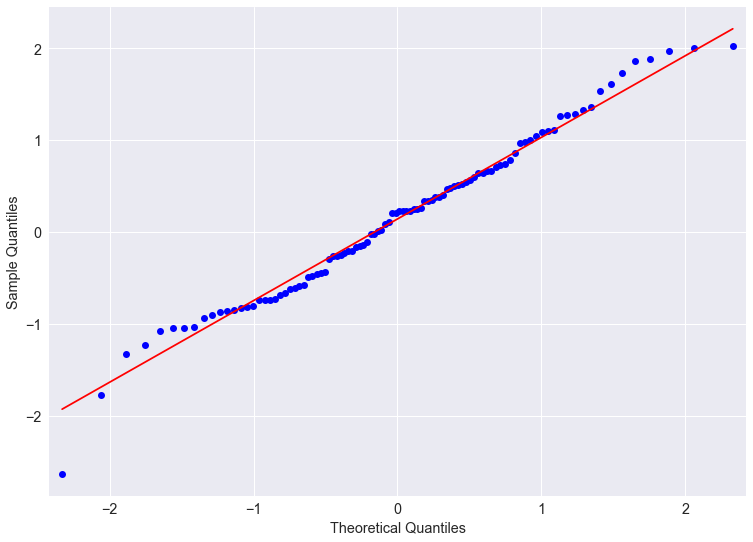

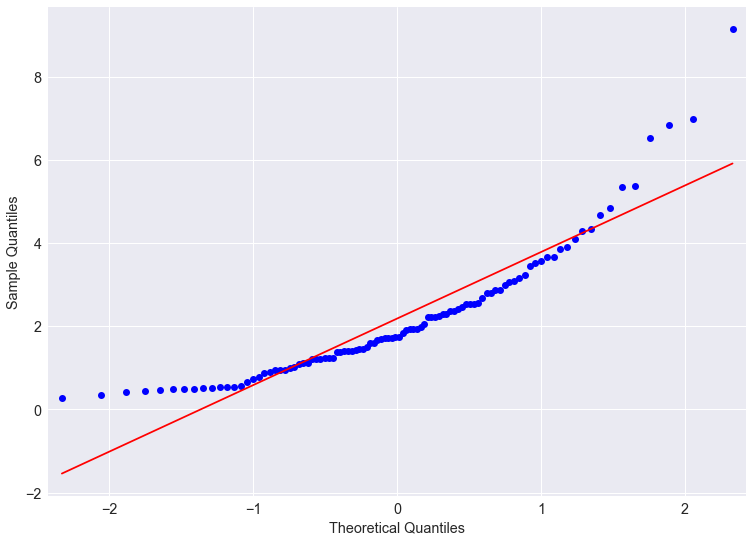

In [53]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot

# generate univariate observations

data1 = np.random.uniform(low=0.0, high=1.0, size=len(data1))
data2 = np.random.normal(loc=0.0, scale=1.0, size=100)
data3 = np.random.gamma(shape=2, scale=1.0, size=100)

# q-q plot
qqplot(data, line='45')
qqplot(data1, line='45')
qqplot(data2, line='s')
qqplot(data3, line='s')
pyplot.show()

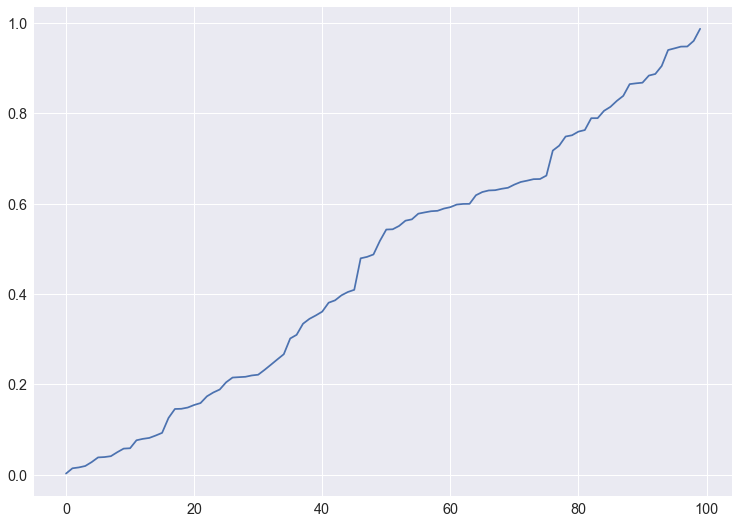

In [49]:
plt.plot(np.sort(data1))

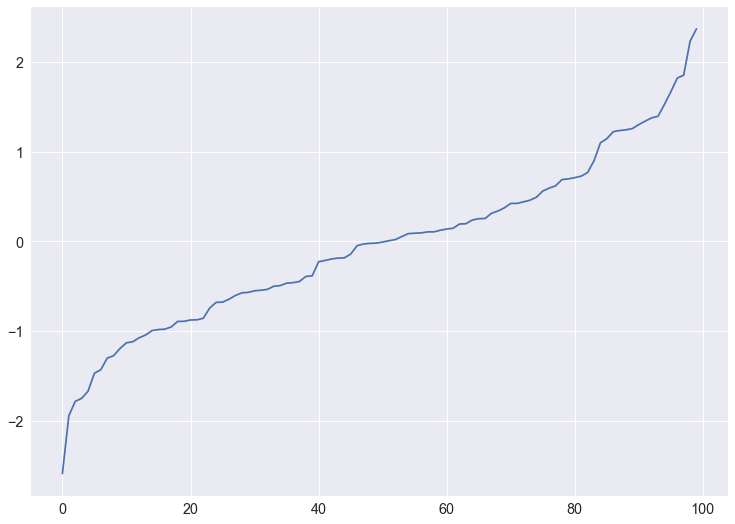

In [50]:
plt.plot(np.sort(data2))

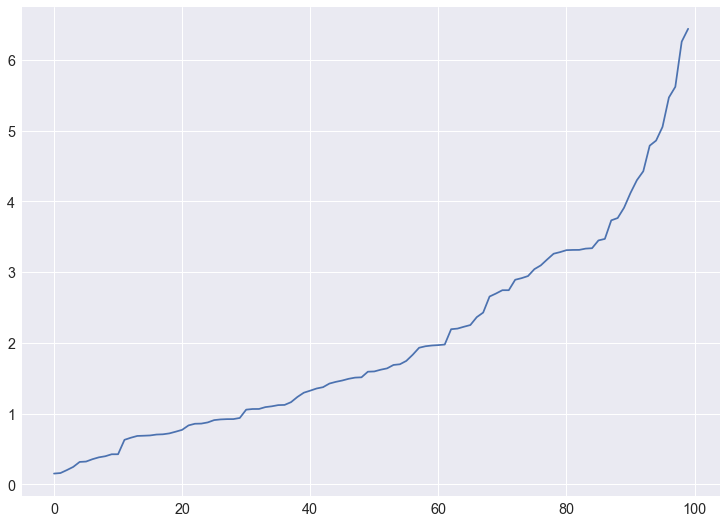

In [51]:
plt.plot(np.sort(data3))

In [52]:
import numpy as np

measurements = np.random.normal(loc = 20, scale = 5, size=100000)

def qq_plot(data, sample_size):
    qq = np.ones([sample_size, 2])
    np.random.shuffle(data)
    qq[:, 0] = np.sort(data[0:sample_size])
    qq[:, 1] = np.sort(np.random.normal(size = sample_size))
    return qq

print (qq_plot(measurements, 1000))

[[ 5.90895646 -2.71887915]
 [ 7.21193932 -2.69113986]
 [ 7.63348725 -2.63392561]
 ...
 [34.31805816  2.92439173]
 [34.41099521  3.32763993]
 [35.07430512  3.53661584]]


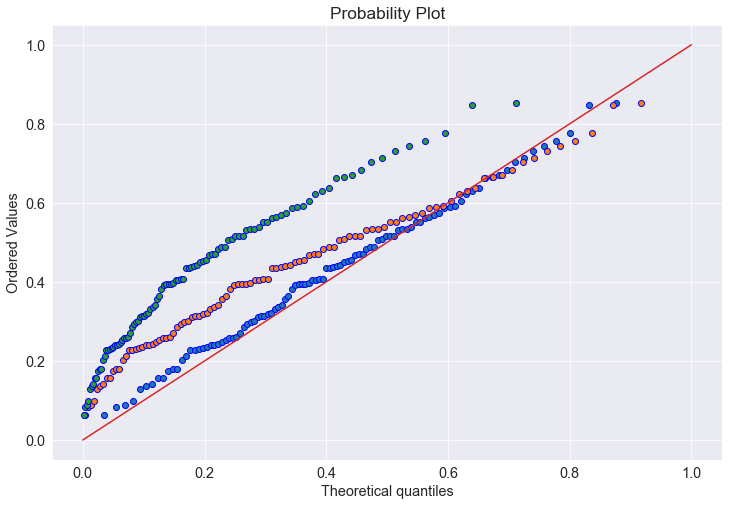

In [4]:


x = np.random.beta(2, 3, size=100)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))



stats.probplot(x, dist=stats.beta, sparams=(2,3), plot=plt, fit=False)
stats.probplot(x, dist=stats.beta, sparams=(1,2), plot=plt, fit=False)
stats.probplot(x, dist=stats.beta, sparams=(1,4), plot=plt, fit=False)

# Remove the regression lines
ax.get_lines()[1].remove()
ax.get_lines()[2].remove()
ax.get_lines()[3].remove()

# Change colour of scatter
ax.get_lines()[0].set_markerfacecolor('C0')
ax.get_lines()[1].set_markerfacecolor('C1')
ax.get_lines()[2].set_markerfacecolor('C2')

# Add on y=x line
ax.plot([0, 1], [0, 1], c='C3')

AttributeError: Unknown property plot

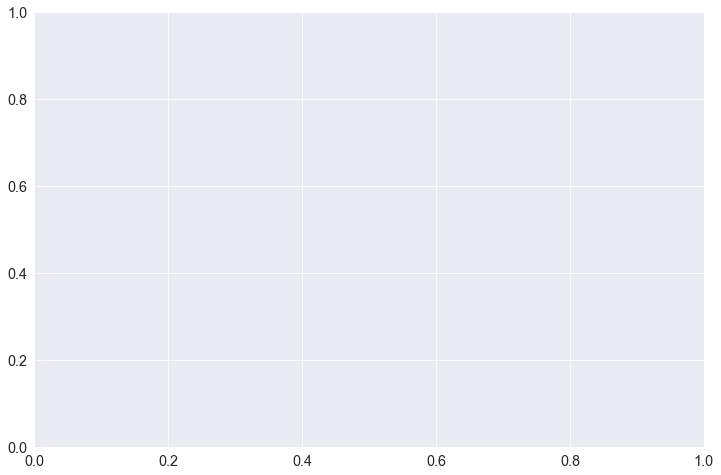

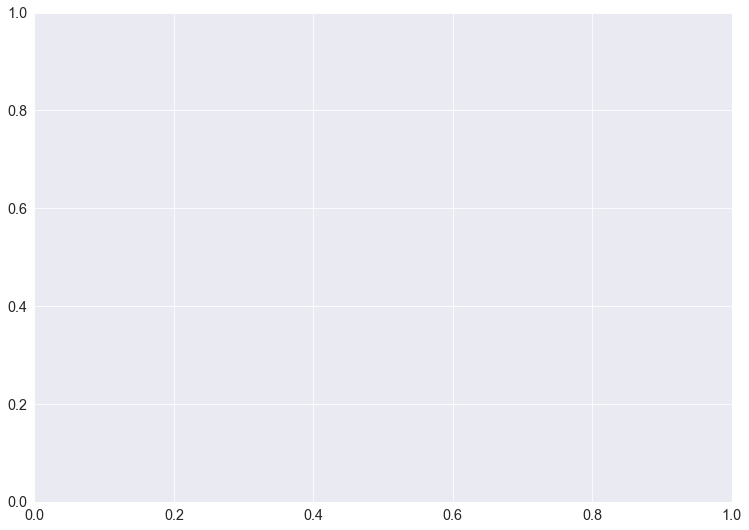

In [10]:


x = np.random.beta(2, 3, size=100)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))



qqplot(data1,plot=plt, line='s')
qqplot(data2,plot=plt, line='s')
qqplot(data3,plot=plt, line='s') 
# Remove the regression lines
ax.get_lines()[1].remove()
ax.get_lines()[2].remove()
ax.get_lines()[3].remove()

# Change colour of scatter
ax.get_lines()[0].set_markerfacecolor('C0')
ax.get_lines()[1].set_markerfacecolor('C1')
ax.get_lines()[2].set_markerfacecolor('C2')

# Add on y=x line
ax.plot([0, 1], [0, 1], c='C3')

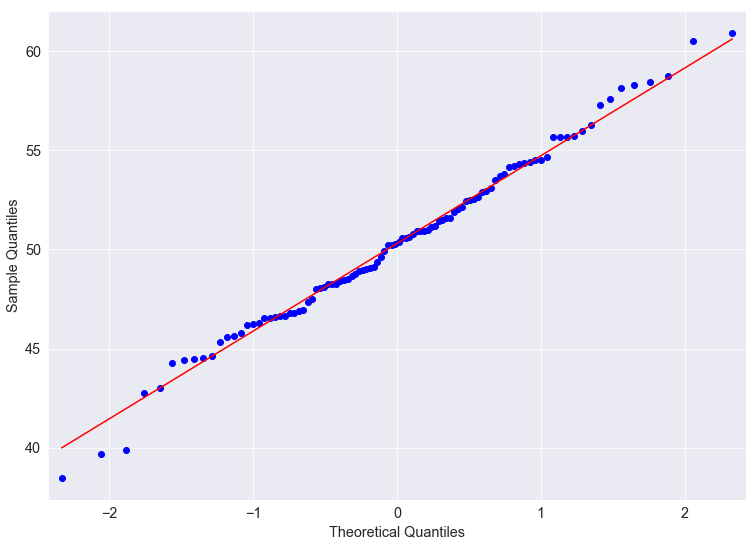

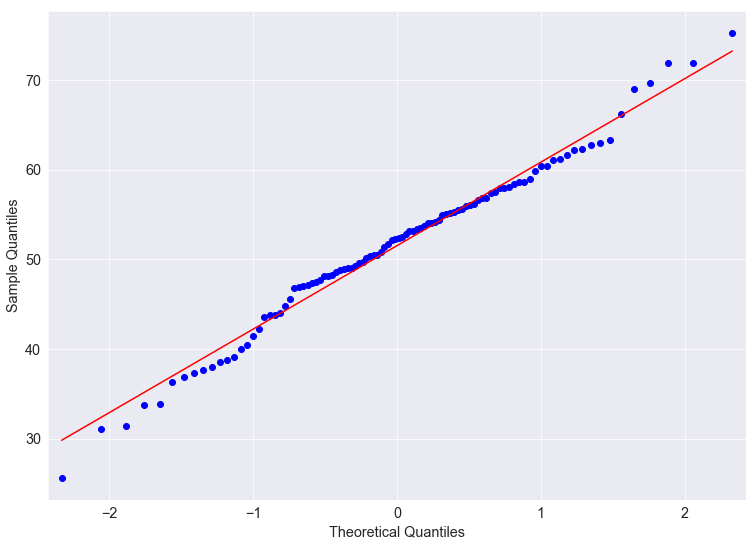

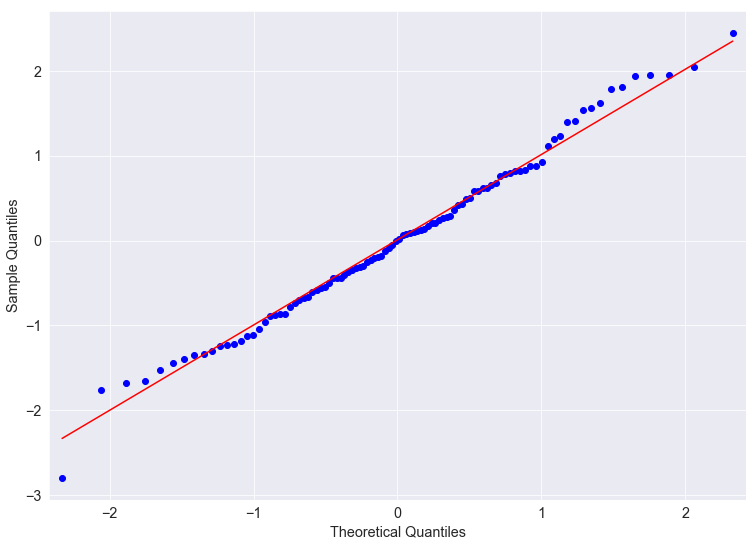

In [5]:
# a list of sample mean
control_means,treatment_means =[],[]
samplesize = 20

#running 500 simulations of : taking 20 samples and calculating their means
for j in range(0,500):
    sample_control = random.choices(control, k=samplesize)
    control_means.append(sum(sample_control)/len(sample_control))
    sample_treatment = random.choices(treatment, k=samplesize)
    treatment_means.append(sum(sample_treatment)/len(sample_treatment))

NameError: name 'control' is not defined

In [ ]:
from scipy.stats import shapiro
from scipy.stats import anderson 
from scipy.stats import kstest

stat, p = shapiro(control_means)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (do not reject H0)')
else:
    print('Sample does not look Normal (reject H0)')
    
stat = anderson(control_means, dist='norm')
print('Statistics={}, p={}'.format(stat, p))

for i in range(len(stat.critical_values)):
    sl, cv = stat.significance_level[i], stat.critical_values[i]
    if stat.statistic < stat.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

stats.kstest(control_means, 'norm', N=999, alternative='two-sided')